In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Generate random data

In [39]:
import random
random.seed(11)
x = 2 * np.random.rand(100, 1)
y = 4 +5 * x + np.random.randn(100, 1)

## Plotting the data

[0, 2, 0, 20]

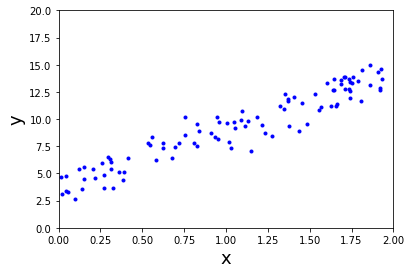

In [40]:
plt.plot(x,y,'b.')
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.axis([0,2,0,20])

#  Normal equation- Analytical way of Linear Regression

In [41]:
x_b = np.c_[np.ones((100,1)),x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print(theta_best)

[[3.79054556]
 [5.23457329]]


In [42]:
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 3.79054556],
       [14.25969213]])

[0, 2, 0, 20]

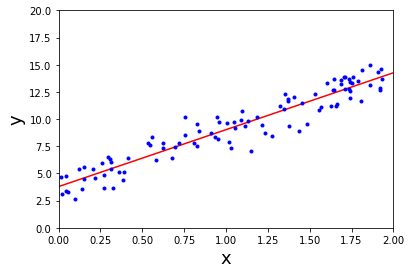

In [43]:
## plotting prediction line
plt.plot(x_new,y_predict,'r-')
plt.plot(x,y,'b.')
plt.xlabel("x", fontsize=18)
plt.ylabel("y", fontsize=18)
plt.axis([0,2,0,20])


# Gradient Descent



<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [44]:

def  cal_cost(theta,x,y):

    
    m = len(y)
    
    predictions = x.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [45]:
def gradient_descent(x,y,theta,learning_rate=0.01,iterations=100):

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(x,theta)
        
        theta = theta -(1/m)*learning_rate*( x.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,x,y)
        
    return theta, cost_history, theta_history
    
    

In [46]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

x_b = np.c_[np.ones((len(x),1)),x]
theta,cost_history,theta_history = gradient_descent(x_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))
print()

Theta0:          3.587,
Theta1:          5.397
Final cost/MSE:  5265.799



In [47]:

def plot_GD(n_iter,lr,ax):

     _ = ax.plot(x,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = x_b.dot(theta)
        theta,h,_ = gradient_descent(x_b,y,theta,lr,1)
        pred = x_b.dot(theta)

        cost_history[i] = h[0]
        _ = ax.plot(x,pred,'r-',alpha=tr)

### Plot the graphs for different iterations and learning rates combination

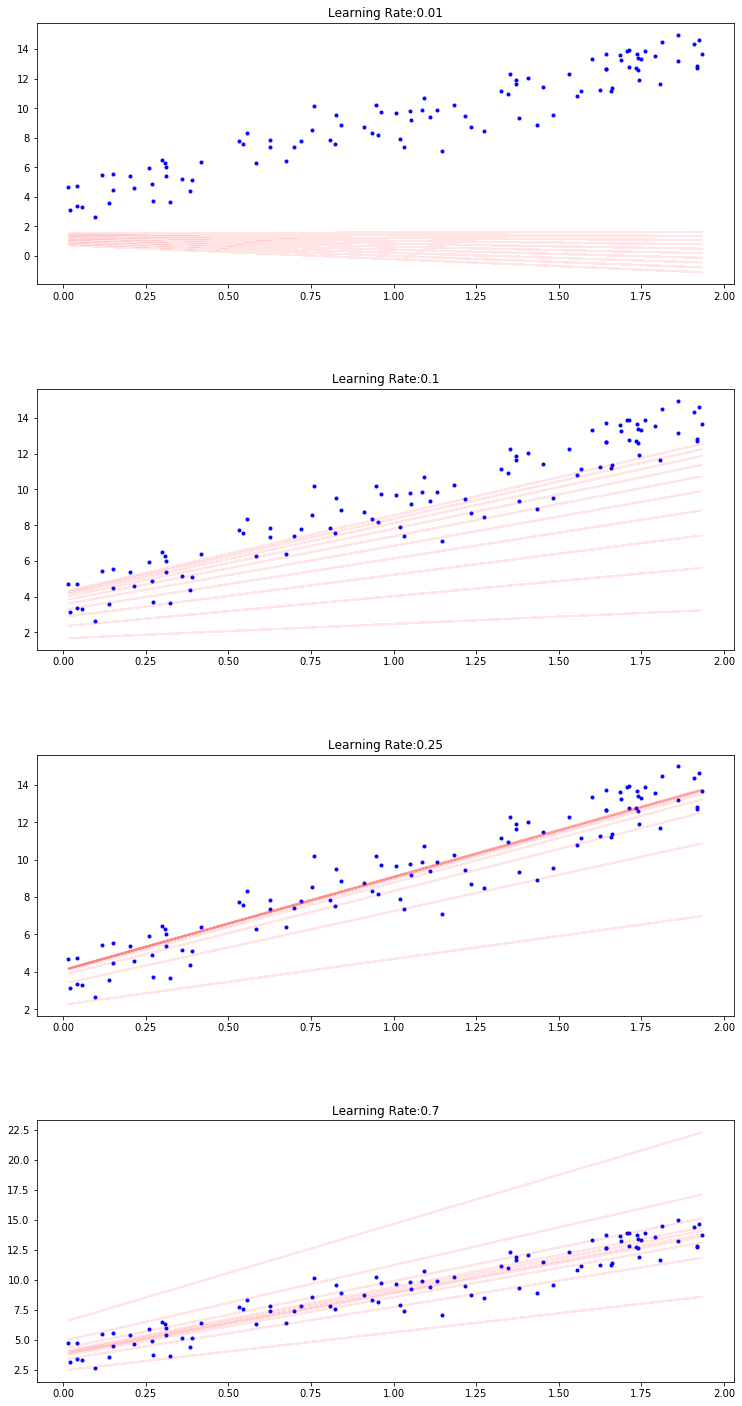

In [49]:
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(10,0.01),(10,0.1),(10,0.25),(10,0.7)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
    
    ax.set_title("Learning Rate:{}".format(lr))
    plot_GD(n_iter,lr,ax)
    

# Stochastic Gradient Descent

In [50]:
def stocashtic_gradient_descent(x,y,theta,learning_rate=0.01,iterations=10):

    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            x_i = x[rand_ind,:].reshape(1,x.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(x_i,theta)

            theta = theta -(1/m)*learning_rate*( x_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,x_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [51]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

x_b = np.c_[np.ones((len(x),1)),x]
theta,cost_history = stocashtic_gradient_descent(x_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:       {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.710,
Theta1:       5.262
Final cost/MSE:  54.086


In [52]:
def plot_SGD(n_iter,lr,ax):

     _ = ax.plot(x,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = x_b.dot(theta)
        theta,h = stocashtic_gradient_descent(x_b,y,theta,lr,1)
        pred = x_b.dot(theta)

        cost_history[i] = h[0]
        _ = ax.plot(x,pred,'r-',alpha=tr)

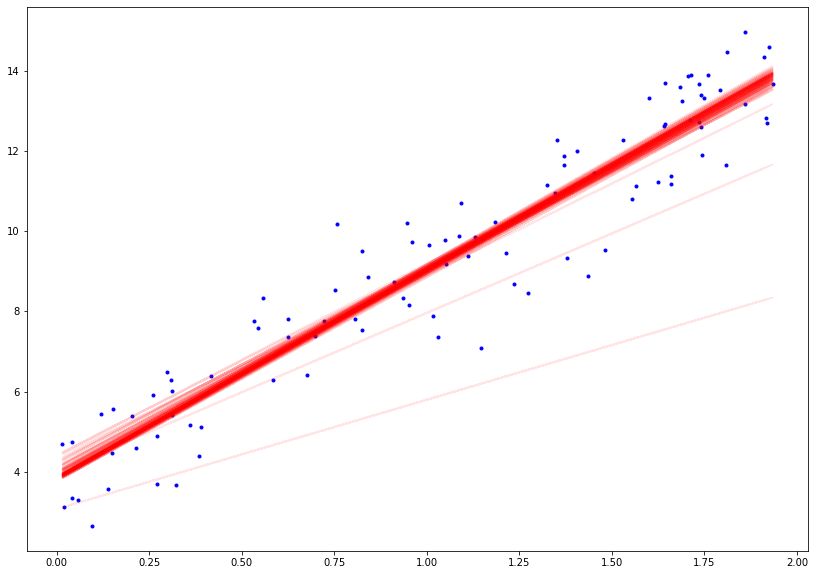

In [53]:
_,ax = plt.subplots(figsize=(14,10))
plot_SGD(100,0.5,ax)